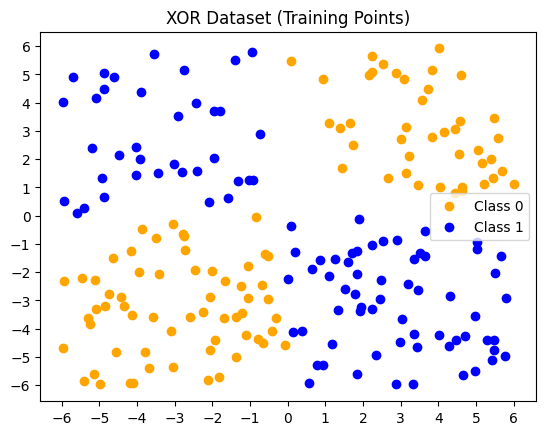

In [1]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn as nn 
import torch.optim as optim  



torch.manual_seed(42)
n_samples = 400  
X = torch.rand(n_samples, 2) * 12 - 6 
y = (X[:, 0] > 0).int() ^ (X[:, 1] > 0).int()  

X_train, X_test = X[:200], X[200:]  
y_train, y_test = y[:200], y[200:]  



plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='orange', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')

plt.xticks(np.arange(-6, 7, 1))
plt.yticks(np.arange(-6, 7, 1))

plt.title('XOR Dataset (Training Points)')
plt.legend()
plt.show()


In [2]:
print(X_train.shape[0])
print(X_test.shape[0])

200
200


MLP model with no regularization on XOR dataset

Epoch [100/1000], Loss: 0.0177
Epoch [200/1000], Loss: 0.0059
Epoch [300/1000], Loss: 0.0029
Epoch [400/1000], Loss: 0.0017
Epoch [500/1000], Loss: 0.0011
Epoch [600/1000], Loss: 0.0007
Epoch [700/1000], Loss: 0.0005
Epoch [800/1000], Loss: 0.0004
Epoch [900/1000], Loss: 0.0003
Epoch [1000/1000], Loss: 0.0003


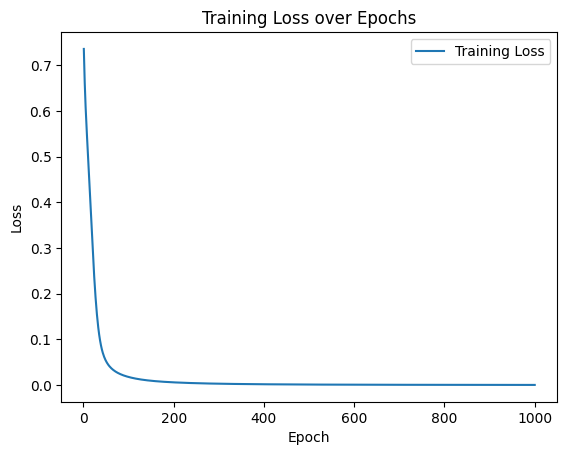

Test Accuracy: 96.50%


In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


model5 = MLP()  
criterion = nn.BCELoss() 
optimizer = optim.Adam(model5.parameters(), lr=0.01) 

num_epochs = 1000  
loss_values = []  

X_train_float = X_train.float()
y_train_float = y_train.float().view(-1, 1)

for epoch in range(num_epochs):
    outputs = model5(X_train_float) 
    loss = criterion(outputs, y_train_float)
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

    loss_values.append(loss.item())

    if (epoch + 1) % 100 == 0: 
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

with torch.no_grad():
    X_test_float = X_test.float()
    y_test_float = y_test.float().view(-1, 1)
    test_outputs = model5(X_test_float) 
    predicted = (test_outputs > 0.5).int() 

accuracy = (predicted.view(-1) == y_test).float().mean()
print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')


In [4]:
accuracy.item()

0.9649999737739563

In [5]:
# import torch
# import torch.nn as nn  # For building neural networks
# import torch.optim as optim  # For optimization
# import matplotlib.pyplot as plt  # For plotting

# # Step 1: Define the MLP model
# class MLP(nn.Module):
#     def __init__(self):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(2, 8)  # Increased neurons in the first layer
#         self.fc2 = nn.Linear(8, 4)  # Additional hidden layer
#         self.fc3 = nn.Linear(4, 1)  # Output layer

#     def forward(self, x):
#         x = torch.sigmoid(self.fc1(x))  # Apply sigmoid activation
#         x = torch.sigmoid(self.fc2(x))  # Second hidden layer with sigmoid
#         x = torch.sigmoid(self.fc3(x))  # Final layer with sigmoid for binary output
#         return x

# # Step 2: Instantiate the model, define loss function and optimizer
# model5 = MLP()  # Create an instance of the MLP model
# criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
# optimizer = optim.Adam(model5.parameters(), lr=0.01)  # Adam optimizer

# # Step 3: Train the model
# num_epochs = 1000  # Number of epochs for training
# loss_values = []  # List to store loss values for plotting
# train_accuracy_values = []  # List to store training accuracy values for plotting

# # Convert data to float type for training
# X_train_float = X_train.float()  # Ensure X_train is a float tensor
# y_train_float = y_train.float().view(-1, 1)  # Reshape for binary classification

# for epoch in range(num_epochs):
#     # Forward pass
#     outputs = model5(X_train_float)  # Pass input through the model
#     loss = criterion(outputs, y_train_float)  # Calculate loss
    
#     # Backward pass and optimization
#     optimizer.zero_grad()  # Clear gradients
#     loss.backward()  # Backpropagation
#     optimizer.step()  # Update parameters

#     # Store the loss value for this epoch
#     loss_values.append(loss.item())

#     # Calculate training accuracy
#     with torch.no_grad():  # Disable gradient calculation for accuracy calculation
#         predicted_train = (outputs > 0.5).int()  # Apply threshold
#         train_accuracy = (predicted_train.view(-1) == y_train).float().mean()  # Calculate accuracy
#         train_accuracy_values.append(train_accuracy.item() * 100)  # Store accuracy in percentage

#     if (epoch + 1) % 100 == 0:  # Print loss and accuracy every 100 epochs
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy.item() * 100:.2f}%')

# # Plot the loss and accuracy over epochs
# plt.figure(figsize=(12, 5))

# # Plot training loss
# plt.subplot(1, 2, 1)
# plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss over Epochs')
# plt.legend()

# # Plot training accuracy
# plt.subplot(1, 2, 2)
# plt.plot(range(1, num_epochs + 1), train_accuracy_values, label='Training Accuracy', color='orange')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy (%)')
# plt.title('Training Accuracy over Epochs')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Step 4: Evaluate the model on test data
# with torch.no_grad():  # Disable gradient calculation for evaluation
#     X_test_float = X_test.float()  # Ensure X_test is a float tensor
#     y_test_float = y_test.float().view(-1, 1)  # Reshape for binary classification
#     test_outputs = model5(X_test_float)  # Get model predictions
#     predicted = (test_outputs > 0.5).int()  # Apply threshold to get predicted classes

# # Calculate test accuracy
# accuracy = (predicted.view(-1) == y_test).float().mean()  # Compare predictions with actual labels
# print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')


MLP model with L1 regularization on XOR dataset of penalty coefficient Lambda using validation set

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X[:200], y[:200], test_size=0.2, random_state=42)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


#L1 regularization function
def l1_regularization(model, lambda_l1):
    l1_norm = sum(torch.sum(torch.abs(param)) for param in model.parameters())
    return lambda_l1 * l1_norm

def train_model(model, X_train, y_train, X_val, y_val, lambda_l1, num_epochs=1000, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    X_train_float = X_train.float()
    y_train_float = y_train.float().view(-1, 1)
    X_val_float = X_val.float()
    y_val_float = y_val.float().view(-1, 1)

    for epoch in range(num_epochs):
        outputs = model(X_train_float)
        loss = criterion(outputs, y_train_float)
        l1_loss = l1_regularization(model, lambda_l1)
        total_loss = loss + l1_loss

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

    with torch.no_grad():
        val_outputs = model(X_val_float)
        val_predicted = (val_outputs > 0.5).int()
        val_accuracy = (val_predicted.view(-1) == y_val).float().mean()
    
    return val_accuracy.item() * 100

lambda_values = [0.001, 0.01, 0.1, 1]
best_lambda = lambda_values[0]
best_accuracy = 0

for lambda_l1 in lambda_values:
    model = MLP()
    val_accuracy = train_model(model, X_train, y_train, X_val, y_val, lambda_l1)
    print(f'Validation Accuracy for λ={lambda_l1}: {val_accuracy:.2f}%')
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_lambda = lambda_l1

print(f'\nBest λ={best_lambda} with Validation Accuracy: {best_accuracy:.2f}%')

model_final = MLP()
train_model(model_final, torch.cat((X_train, X_val)), torch.cat((y_train, y_val)), X_val, y_val, best_lambda)

with torch.no_grad():
    X_test_float = X[200:].float()
    y_test_float = y[200:].float().view(-1, 1)
    test_outputs = model_final(X_test_float)
    predicted = (test_outputs > 0.5).int()
    test_accuracy = (predicted.view(-1) == y[200:]).float().mean()

print(f'Final Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Validation Accuracy for λ=0.001: 100.00%
Validation Accuracy for λ=0.01: 100.00%
Validation Accuracy for λ=0.1: 55.00%
Validation Accuracy for λ=1: 55.00%

Best λ=0.001 with Validation Accuracy: 100.00%
Final Test Accuracy: 97.00%


In [7]:
test_accuracy.item()

0.9700000286102295

In [8]:
print(X_val.shape)

torch.Size([40, 2])


MLP model with L2 regularization on XOR dataset of penalty coefficient weight_decay using validation set

In [9]:
torch.manual_seed(42)
n_samples = 400
X = torch.rand(n_samples, 2) * 12 - 6
y = (X[:, 0] > 0).int() ^ (X[:, 1] > 0).int()

X_train, X_val, y_train, y_val = train_test_split(X[:200], y[:200], test_size=0.2, random_state=42)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


# Function to train model with L2 regularization
def train_model_with_l2(model, X_train, y_train, X_val, y_val, weight_decay, num_epochs=1000, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    X_train_float = X_train.float()
    y_train_float = y_train.float().view(-1, 1)
    X_val_float = X_val.float()
    y_val_float = y_val.float().view(-1, 1)

    for epoch in range(num_epochs):
        outputs = model(X_train_float)
        loss = criterion(outputs, y_train_float)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        val_outputs = model(X_val_float)
        val_predicted = (val_outputs > 0.5).int()
        val_accuracy = (val_predicted.view(-1) == y_val).float().mean()

    return val_accuracy.item() * 100

weight_decay_values = [0.001, 0.01, 0.1, 1]
best_weight_decay = weight_decay_values[0]
best_accuracy = 0

for weight_decay in weight_decay_values:
    model = MLP()
    val_accuracy = train_model_with_l2(model, X_train, y_train, X_val, y_val, weight_decay)
    print(f'Validation Accuracy for weight_decay={weight_decay}: {val_accuracy:.2f}%')
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_weight_decay = weight_decay

print(f'\nBest weight_decay={best_weight_decay} with Validation Accuracy: {best_accuracy:.2f}%')

model_final1 = MLP()
train_model_with_l2(model_final1, torch.cat((X_train, X_val)), torch.cat((y_train, y_val)), X_val, y_val, best_weight_decay)

with torch.no_grad():
    X_test_float = X[200:].float()
    y_test_float = y[200:].float().view(-1, 1)
    test_outputs = model_final1(X_test_float)
    predicted = (test_outputs > 0.5).int()
    test_accuracy1 = (predicted.view(-1) == y[200:]).float().mean()

print(f'Final Test Accuracy with Best weight_decay: {test_accuracy1.item() * 100:.2f}%')


Validation Accuracy for weight_decay=0.001: 100.00%
Validation Accuracy for weight_decay=0.01: 100.00%
Validation Accuracy for weight_decay=0.1: 97.50%
Validation Accuracy for weight_decay=1: 45.00%

Best weight_decay=0.001 with Validation Accuracy: 100.00%
Final Test Accuracy with Best weight_decay: 96.00%


Logistic Regression Model on XOR dataset with additional features

In [10]:
#Feature Engineering (Adding additional features: x1*x2, x1^2, x2^2)
def add_features(X):
    x1 = X[:, 0]  
    x2 = X[:, 1]  

    x1_x2 = x1 * x2 
    x1_squared = x1 ** 2  
    x2_squared = x2 ** 2  

    X_new = torch.cat([x1.unsqueeze(1), x2.unsqueeze(1), x1_x2.unsqueeze(1), x1_squared.unsqueeze(1), x2_squared.unsqueeze(1)], dim=1)
    return X_new


# Define the Logistic Regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1) 

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  
        
# Train the Logistic Regression model
def train_logistic_regression_model(model, X_train, y_train, num_epochs=1000, lr=0.01):
    criterion = nn.BCELoss() 
    optimizer = optim.Adam(model.parameters(), lr=lr) 

    y_train_float = y_train.float().view(-1, 1)

    for epoch in range(num_epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train_float)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the Logistic Regression model
def evaluate_logistic_regression_model(model, X_test, y_test):
    with torch.no_grad(): 
        test_outputs = model(X_test) 
        predicted = (test_outputs > 0.5).int()  

    accuracy = (predicted.view(-1) == y_test).float().mean() 
    return accuracy.item() * 100  

X_train_new = add_features(X_train)
X_test_new = add_features(X_test)

input_size = X_train_new.shape[1] 
logistic_model = LogisticRegressionModel(input_size) 

# Train the model
train_logistic_regression_model(logistic_model, X_train_new, y_train)

accuracy_logistic = evaluate_logistic_regression_model(logistic_model, X_test_new, y_test)
print(f'Logistic Regression Accuracy with additional features: {accuracy_logistic:.2f}%')


Epoch [100/1000], Loss: 0.0806
Epoch [200/1000], Loss: 0.0665
Epoch [300/1000], Loss: 0.0566
Epoch [400/1000], Loss: 0.0494
Epoch [500/1000], Loss: 0.0440
Epoch [600/1000], Loss: 0.0398
Epoch [700/1000], Loss: 0.0365
Epoch [800/1000], Loss: 0.0337
Epoch [900/1000], Loss: 0.0314
Epoch [1000/1000], Loss: 0.0294
Logistic Regression Accuracy with additional features: 96.50%


Logistic Regression Model on XOR dataset with limited features

In [11]:
def add_features1(X):
    x1 = X[:, 0]   
    x2 = X[:, 1]  

    x1_x2 = x1 * x2

    X_new1 = torch.cat([x1.unsqueeze(1), x2.unsqueeze(1), x1_x2.unsqueeze(1), ], dim=1)
    return X_new1

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  
    
#Train the Logistic Regression model
def train_logistic_regression_model(model, X_train, y_train, num_epochs=1000, lr=0.01):
    criterion = nn.BCELoss()  
    optimizer = optim.Adam(model.parameters(), lr=lr)  

    y_train_float = y_train.float().view(-1, 1)

    for epoch in range(num_epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train_float)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

#Evaluate the Logistic Regression model
def evaluate_logistic_regression_model(model, X_test, y_test):
    with torch.no_grad():  
        test_outputs = model(X_test) 
        predicted = (test_outputs > 0.5).int()  

    # Calculate accuracy
    accuracy = (predicted.view(-1) == y_test).float().mean() 
    return accuracy.item() * 100 

X_train_new = add_features1(X_train) 
X_test_new = add_features1(X_test) 

input_size = X_train_new.shape[1]  
logistic_model1 = LogisticRegressionModel(input_size)  

# Train the model
train_logistic_regression_model(logistic_model1, X_train_new, y_train)

accuracy_logistic = evaluate_logistic_regression_model(logistic_model1, X_test_new, y_test)
print(f'Logistic Regression Accuracy with additional features: {accuracy_logistic:.2f}%')


Epoch [100/1000], Loss: 0.0845
Epoch [200/1000], Loss: 0.0633
Epoch [300/1000], Loss: 0.0526
Epoch [400/1000], Loss: 0.0459
Epoch [500/1000], Loss: 0.0412
Epoch [600/1000], Loss: 0.0377
Epoch [700/1000], Loss: 0.0348
Epoch [800/1000], Loss: 0.0325
Epoch [900/1000], Loss: 0.0306
Epoch [1000/1000], Loss: 0.0289
Logistic Regression Accuracy with additional features: 99.50%


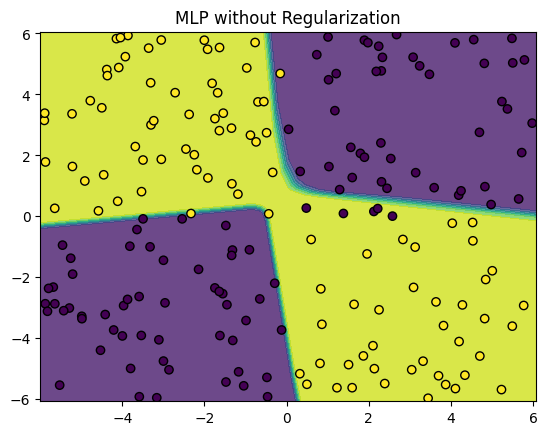

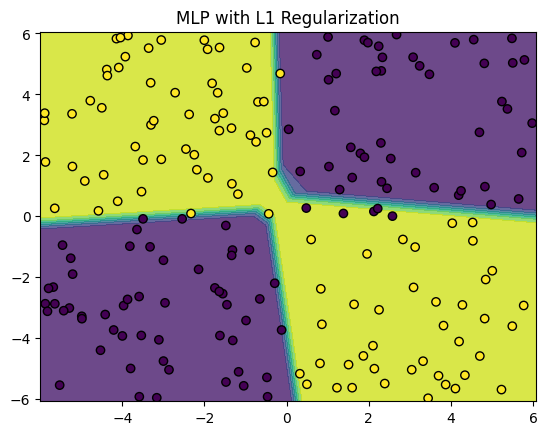

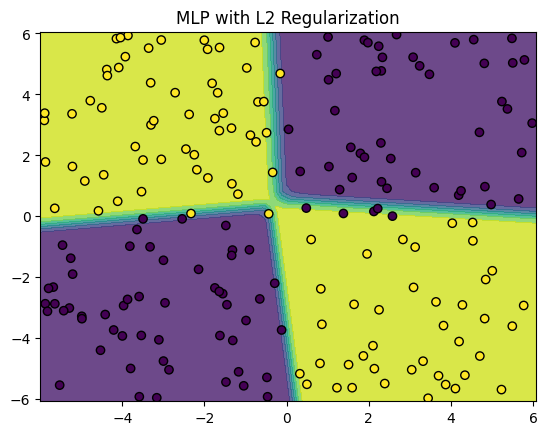

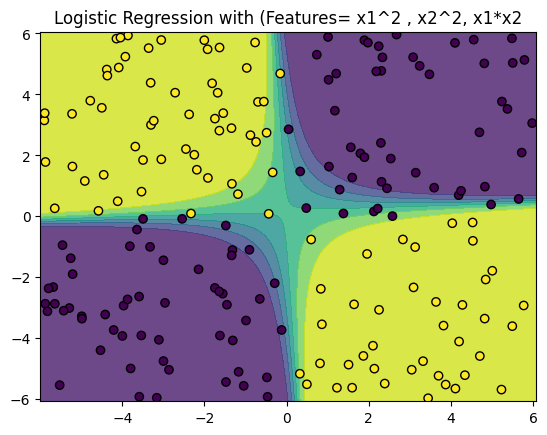

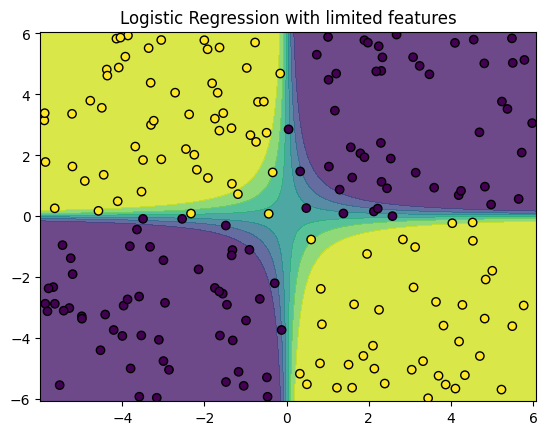

In [12]:
def plot_decision_surface(model, X, y, feature_transformer=None, title="Decision Surface"):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    if feature_transformer:
        grid = feature_transformer(grid)

    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()


#MLP model (no regularization)
plot_decision_surface(model5, X_test, y_test, title="MLP without Regularization")

#MLP model with L1 regularization
plot_decision_surface(model_final, X_test, y_test, title="MLP with L1 Regularization")

#MLP model with L2 regularization
plot_decision_surface(model_final1, X_test, y_test, title="MLP with L2 Regularization")

#Logistic Regression model with additional features
plot_decision_surface(logistic_model, X_test, y_test, feature_transformer=add_features, title="Logistic Regression with (Features= x1^2 , x2^2, x1*x2")

#Logistic Regression model with limited features
plot_decision_surface(logistic_model1, X_test, y_test, feature_transformer=add_features1, title="Logistic Regression with limited features" )


# Model Comparison on XOR Dataset

This analysis compares the decision boundaries of different models on the XOR dataset to see how well each one captures the complex pattern.

## 1. MLP without Regularization
- **Boundary**: Quite detailed and complex, following the data closely.
- **Insight**: Without regularization, it’s more prone to overfitting, adapting too much to the specifics of the data.

## 2. MLP with L1 Regularization
- **Boundary**: Noticeably smoother and simpler.
- **Insight**: L1 regularization helps simplify the model by pushing some weights towards zero, reducing overfitting and adding interpretability.

## 3. MLP with L2 Regularization
- **Boundary**: Well-defined, with some smoothness.
- **Insight**: L2 regularization penalizes large weights, making the model less prone to overfitting and generally more robust.

## 4. Logistic Regression with Limited Features
- **Boundary**: A curved, non-linear boundary that approximates the XOR pattern.
- **Insight**: Adding polynomial features helps the model capture non-linearity, though it’s not as flexible as the MLP.

## 5. Logistic Regression with only \( x1 * x2 \) Features 
- **Boundary**: Simpler and less flexible.
- **Insight**: Adding just the interaction term captures some non-linearity but doesn’t fully separate the XOR classes.